# 9. 數據聚合與分組運算

In [388]:
%pylab inline
from pandas import Series, DataFrame
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


## GroupBy技術
分組運算是一種 Split-Apply-Combine的過程，類似於MapReduce的模式

In [3]:
df = DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                'key2' : ['one', 'two', 'one', 'two', 'one'],
                'data1' : np.random.randn(5),
                'data2' : np.random.randn(5)})
df

,data1,data2,key1,key2
0,-2.082519,-0.569661,a,one
1,-1.437313,1.246842,a,two
2,-0.246792,-0.062114,b,one
3,1.474713,-0.988204,b,two
4,1.785627,-0.363380,a,one


In [4]:
# 使用 groupby方法
grouped = df.data1.groupby(df.key1)
grouped
# 產生一個 SeriesGroupBy物件

In [5]:
# 用GroupBy物件的 mean()方法
# mean()方法是一種 聚合運算
grouped.mean()

key1
a   -0.578068
b    0.613960
Name: data1, dtype: float64

#### 分組所依據的鍵，可以是任何長度的數組，且可以有多層

In [6]:
# 也可以建立多層次的分組
grouped = df.data1.groupby([df.key1, df.key2])
grouped.mean()

key1  key2
a     one    -0.148446
      two    -1.437313
b     one    -0.246792
      two     1.474713
Name: data1, dtype: float64

In [13]:
grouped.mean().unstack('key1')

key1,a,b
key2,,
one,-0.148446,-0.246792
two,-1.437313,1.474713


In [15]:
# 也可以對多個 columns同時做分組統計運算
df.groupby(df.key1).mean()

,data1,data2
key1,,
a,-0.578068,0.104600
b,0.613960,-0.525159


In [16]:
# 也可以直接以 column索引的名稱來指定分組
df.groupby(['key1', 'key2']).mean()

data1     data2
key1 key2                    
a    one  -0.148446 -0.466520
     two  -1.437313  1.246842
b    one  -0.246792 -0.062114
     two   1.474713 -0.988204

In [17]:
# GroupBy 的 size()方法，傳回各分組的大小
df.groupby(['key1', 'key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

### 對分組進行迭代

In [27]:
for name, group in df.groupby('key1'):
    print(name)
    print(group) 
# 所以分組的結果，是拆分為多個 DataFrame    

a
      data1     data2 key1 key2
0 -2.082519 -0.569661    a  one
1 -1.437313  1.246842    a  two
4  1.785627 -0.363380    a  one
b
      data1     data2 key1 key2
2 -0.246792 -0.062114    b  one
3  1.474713 -0.988204    b  two


In [30]:
# 依照多重鍵分組，groupby元素元組的第一個元素是 多重鍵的 元組
for name, group in df.groupby(['key1', 'key2']):
    print(name)
    print(group) 

('a', 'one')
      data1     data2 key1 key2
0 -2.082519 -0.569661    a  one
4  1.785627 -0.363380    a  one
('a', 'two')
      data1     data2 key1 key2
1 -1.437313  1.246842    a  two
('b', 'one')
      data1     data2 key1 key2
2 -0.246792 -0.062114    b  one
('b', 'two')
      data1     data2 key1 key2
3  1.474713 -0.988204    b  two


In [36]:
# 可以以groupby()的結果，組成一個字典
groups = list(df.groupby(['key1', 'key2']))
groups

[(('a', 'one'),       data1     data2 key1 key2
  0 -2.082519 -0.569661    a  one
  4  1.785627 -0.363380    a  one),
 (('a', 'two'),       data1     data2 key1 key2
  1 -1.437313  1.246842    a  two),
 (('b', 'one'),       data1     data2 key1 key2
  2 -0.246792 -0.062114    b  one),
 (('b', 'two'),       data1     data2 key1 key2
  3  1.474713 -0.988204    b  two)]

In [38]:
groups_dict = dict(groups)

In [41]:
groups_dict[('a', 'two')]

,data1,data2,key1,key2
1,-1.437313,1.246842,a,two


In [42]:
# groupby()預設是在 axis = 0 的方向上進行分組的，但也可對於任何軸向來分組
df

,data1,data2,key1,key2
0,-2.082519,-0.569661,a,one
1,-1.437313,1.246842,a,two
2,-0.246792,-0.062114,b,one
3,1.474713,-0.988204,b,two
4,1.785627,-0.363380,a,one


In [43]:
df.dtypes

data1    float64
data2    float64
key1      object
key2      object
dtype: object

In [44]:
# 在 axis = 1 的方向上進行分組的
grouped = df.groupby(df.dtypes, axis = 1)
dict(list(grouped))

{dtype('float64'):       data1     data2
 0 -2.082519 -0.569661
 1 -1.437313  1.246842
 2 -0.246792 -0.062114
 3  1.474713 -0.988204
 4  1.785627 -0.363380, dtype('O'):   key1 key2
 0    a  one
 1    a  two
 2    b  one
 3    b  two
 4    a  one}

### 選取一個或一組columns

In [49]:
grouped = df.groupby('key1')
dict(list(grouped))

{'a':       data1     data2 key1 key2
 0 -2.082519 -0.569661    a  one
 1 -1.437313  1.246842    a  two
 4  1.785627 -0.363380    a  one, 'b':       data1     data2 key1 key2
 2 -0.246792 -0.062114    b  one
 3  1.474713 -0.988204    b  two}

In [51]:
df.groupby('key1')['data1']
# 等同於
df['data1'].groupby(df['key1'])

df.groupby('key1')grouped[['data2']]
# 等同於
df[['data2']].groupby(df['key1'])

In [52]:
# 有時候只需要對部分的資料列進行聚合
df.groupby(['key1', 'key2'])[['data2']].mean()
# 傳回 DataFrame

data2
key1 key2          
a    one  -0.466520
     two   1.246842
b    one  -0.062114
     two  -0.988204

In [53]:
df.groupby(['key1', 'key2'])['data2'].mean()
# 傳回 Series

key1  key2
a     one    -0.466520
      two     1.246842
b     one    -0.062114
      two    -0.988204
Name: data2, dtype: float64

### 通過字典或Series進行分組

In [55]:
people = DataFrame(np.random.randn(5, 5),
                   columns=['a', 'b', 'c', 'd', 'e'],
                   index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])
people.ix[2:3, ['b', 'c']] = np.nan
people

,a,b,c,d,e
Joe,-0.283039,-0.143407,-1.043138,1.757314,-0.089450
Steve,-0.152032,-1.430140,-0.114802,-1.569893,-0.266133
Wes,-1.361563,NaN,NaN,-0.476030,0.309741
Jim,-0.008201,-0.107676,-0.490408,0.811637,1.026443
Travis,1.690063,-1.204090,0.027696,-0.426872,0.837586


In [57]:
# 已經知道 列的分組關係
mapping = {'a': 'red', 'b': 'red', 'c': 'blue',
           'd': 'blue', 'e': 'red', 'f' : 'orange'}
#只需要將mapping關係的字典傳給 groupby()
grouped_by_column = people.groupby(mapping, axis = 1)
grouped_by_column.sum()

,blue,red
Joe,0.714176,-0.515896
Steve,-1.684695,-1.848305
Wes,-0.476030,-1.051822
Jim,0.321229,0.910565
Travis,-0.399176,1.323560


In [58]:
map_series = Series(mapping)
map_series

a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object

In [59]:
# 也可以將mapping關係的Series物件傳給 groupby()
grouped_by_column = people.groupby(map_series, axis = 1)
grouped_by_column.sum()

,blue,red
Joe,0.714176,-0.515896
Steve,-1.684695,-1.848305
Wes,-0.476030,-1.051822
Jim,0.321229,0.910565
Travis,-0.399176,1.323560


### 透過函數進行分組

In [61]:
people

,a,b,c,d,e
Joe,-0.283039,-0.143407,-1.043138,1.757314,-0.089450
Steve,-0.152032,-1.430140,-0.114802,-1.569893,-0.266133
Wes,-1.361563,NaN,NaN,-0.476030,0.309741
Jim,-0.008201,-0.107676,-0.490408,0.811637,1.026443
Travis,1.690063,-1.204090,0.027696,-0.426872,0.837586


In [65]:
# 被當作分組鍵的函數都會在各個索引值上被調用一次，返回值就被當作分組名稱
people.groupby(len).mean()

,a,b,c,d,e
3,-0.550934,-0.125542,-0.766773,0.697640,0.415578
5,-0.152032,-1.430140,-0.114802,-1.569893,-0.266133
6,1.690063,-1.204090,0.027696,-0.426872,0.837586


In [66]:
# 函數、列表、字典、Series都可以混用，因為最後都會被轉換為數組
key_list = ['one', 'one', 'one', 'two', 'two']
people.groupby([len, key_list]).min()

a         b         c         d         e
3 one -1.361563 -0.143407 -1.043138 -0.476030 -0.089450
  two -0.008201 -0.107676 -0.490408  0.811637  1.026443
5 one -0.152032 -1.430140 -0.114802 -1.569893 -0.266133
6 two  1.690063 -1.204090  0.027696 -0.426872  0.837586

In [67]:
# 根據索引級別分組
# 要依據層次化索引來分組聚合，只需要透過 level參數即可
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],
                                     [1, 3, 5, 1, 3]], names=['cty', 'tenor'])

hier_df = DataFrame(np.random.randn(4, 5), columns=columns)
hier_df

cty          US                            JP          
tenor         1         3         5         1         3
0     -1.313037 -0.465384 -2.189800 -0.132501 -0.442363
1      0.454562  0.950787 -2.696153  0.204786 -0.174787
2      0.008155 -0.713629  0.505133  0.099231 -1.112909
3     -0.101568 -0.126494 -1.176267 -0.151183  0.844368

In [68]:
hier_df.groupby(level = 'cty', axis = 1).count()

cty,JP,US
0,2,3
1,2,3
2,2,3
3,2,3


## 數據聚合

In [69]:
# 可以自訂一聚合方法。聚合方法會對每一個分組之後的group操作一次
df

,data1,data2,key1,key2
0,-2.082519,-0.569661,a,one
1,-1.437313,1.246842,a,two
2,-0.246792,-0.062114,b,one
3,1.474713,-0.988204,b,two
4,1.785627,-0.363380,a,one


In [78]:
# Series, DataFrame的方法都可以施加在 group上
# quantile 是 Series的方法
grouped = df.groupby('key1')
grouped['data1'].quantile(0.9)

key1
a    1.141039
b    1.302563
Name: data1, dtype: float64

In [84]:
# 透過 aggregate()方法，可以使用自訂函式
def peak_to_peak(arr):
    return arr.max() - arr.min()

grouped.aggregate(peak_to_peak)

,data1,data2
key1,,
a,3.868146,1.816502
b,1.721506,0.926090


In [81]:
# describe 也可以用
grouped.describe()

data1     data2
key1                          
a    count  3.000000  3.000000
     mean  -0.578068  0.104600
     std    2.072285  0.994573
     min   -2.082519 -0.569661
     25%   -1.759916 -0.466520
     50%   -1.437313 -0.363380
     75%    0.174157  0.441731
     max    1.785627  1.246842
b    count  2.000000  2.000000
     mean   0.613960 -0.525159
     std    1.217288  0.654844
     min   -0.246792 -0.988204
     25%    0.183584 -0.756682
     50%    0.613960 -0.525159
     75%    1.044337 -0.293637
     max    1.474713 -0.062114

In [83]:
tips = pd.read_csv('D:\\a 電腦類書籍 CD\\Python\\python for data analysis\\pydata-book\\ch08\\tips.csv')
tips['tip_total_ratio'] = tips['tip']  / tips['total_bill'] 
tips[:5]

,total_bill,tip,sex,smoker,day,time,size,tip_total_ratio
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


### 面向列的多函數應用

In [85]:
# 對不同的列使用不同的聚合函數

grouped = tips.groupby(['sex', 'smoker'])
grouped_pct = grouped['tip_total_ratio']
grouped_pct.agg('mean')

sex     smoker
Female  No        0.156921
        Yes       0.182150
Male    No        0.160669
        Yes       0.152771
Name: tip_total_ratio, dtype: float64

In [87]:
# 傳入一組函數或函數名，得到的DataFrame的列就會以相應的函數命名
grouped_pct.agg(['mean', 'std', peak_to_peak])

mean       std  peak_to_peak
sex    smoker                                  
Female No      0.156921  0.036421      0.195876
       Yes     0.182150  0.071595      0.360233
Male   No      0.160669  0.041849      0.220186
       Yes     0.152771  0.090588      0.674707

In [88]:
# 如果傳入一個由(name, function)的元組列表，則各元組的第一個元素就會被當作DataFrame的 column名稱
grouped_pct.agg([('foo', 'mean'), ('bar', np.std)])

foo       bar
sex    smoker                    
Female No      0.156921  0.036421
       Yes     0.182150  0.071595
Male   No      0.160669  0.041849
       Yes     0.152771  0.090588

In [89]:
# 對於 DataFrame，還可以定義使用多個函數
functions = ['count', 'mean', 'max']
result = grouped['tip_total_ratio', 'total_bill'].agg(functions)
result

tip_total_ratio                     total_bill                  
                        count      mean       max      count       mean    max
sex    smoker                                                                 
Female No                  54  0.156921  0.252672         54  18.105185  35.83
       Yes                 33  0.182150  0.416667         33  17.977879  44.30
Male   No                  97  0.160669  0.291990         97  19.791237  48.33
       Yes                 60  0.152771  0.710345         60  22.284500  50.81

In [90]:
result['tip_total_ratio']

count      mean       max
sex    smoker                           
Female No         54  0.156921  0.252672
       Yes        33  0.182150  0.416667
Male   No         97  0.160669  0.291990
       Yes        60  0.152771  0.710345

In [92]:
# 自訂一結果的列名稱
functions = [('Counts', 'count'), ('Mean', 'mean'), ('Max', 'max')]
result = grouped['tip_total_ratio', 'total_bill'].agg(functions)
result

tip_total_ratio                     total_bill                  
                       Counts      Mean       Max     Counts       Mean    Max
sex    smoker                                                                 
Female No                  54  0.156921  0.252672         54  18.105185  35.83
       Yes                 33  0.182150  0.416667         33  17.977879  44.30
Male   No                  97  0.160669  0.291990         97  19.791237  48.33
       Yes                 60  0.152771  0.710345         60  22.284500  50.81

In [108]:
# 對於 DataFrame，還可以定義不同列使用不同的函數
# 傳入一個名稱與函數的字典
functions = {'tip_total_ratio':  np.max, 'total_bill': np.min}
result = grouped.agg(functions)
result

total_bill  tip_total_ratio
sex    smoker                             
Female No            7.25         0.252672
       Yes           3.07         0.416667
Male   No            7.51         0.291990
       Yes           7.25         0.710345

In [109]:
# 對於 DataFrame，還可以定義不同列使用不同的函數
functions = {'tip_total_ratio': (np.max,  np.min), 
             'size': ['sum', 'min']}
result = grouped.agg(functions)
result

size     tip_total_ratio          
               sum min            amax      amin
sex    smoker                                   
Female No      140   1        0.252672  0.056797
       Yes      74   1        0.416667  0.056433
Male   No      263   2        0.291990  0.071804
       Yes     150   1        0.710345  0.035638

### 以 無索引 的形式返回聚合數據

In [110]:
# 透過 as_index = False，分組鍵不要成為索引
tips.groupby(['sex', 'smoker'], as_index = False).mean()

,sex,smoker,total_bill,tip,size,tip_total_ratio
0,Female,No,18.105185,2.773519,2.592593,0.156921
1,Female,Yes,17.977879,2.931515,2.242424,0.182150
2,Male,No,19.791237,3.113402,2.711340,0.160669
3,Male,Yes,22.284500,3.051167,2.500000,0.152771


In [111]:
tips.groupby(['sex', 'smoker']).mean()

total_bill       tip      size  tip_total_ratio
sex    smoker                                                 
Female No       18.105185  2.773519  2.592593         0.156921
       Yes      17.977879  2.931515  2.242424         0.182150
Male   No       19.791237  3.113402  2.711340         0.160669
       Yes      22.284500  3.051167  2.500000         0.152771

## 分組級運算和轉換

In [112]:
# 聚合運算 是數據轉換的一種特例
# 為df增加一列 用於存放各索引分組平均值
df

,data1,data2,key1,key2
0,-2.082519,-0.569661,a,one
1,-1.437313,1.246842,a,two
2,-0.246792,-0.062114,b,one
3,1.474713,-0.988204,b,two
4,1.785627,-0.363380,a,one


In [114]:
# 計算分組mean
k1_means = df.groupby('key1').mean().add_prefix('mean_')
k1_means

,mean_data1,mean_data2
key1,,
a,-0.578068,0.104600
b,0.613960,-0.525159


In [115]:
# merge
pd.merge(df, k1_means, left_on = 'key1', right_index = True)

,data1,data2,key1,key2,mean_data1,mean_data2
0,-2.082519,-0.569661,a,one,-0.578068,0.104600
1,-1.437313,1.246842,a,two,-0.578068,0.104600
4,1.785627,-0.363380,a,one,-0.578068,0.104600
2,-0.246792,-0.062114,b,one,0.613960,-0.525159
3,1.474713,-0.988204,b,two,0.613960,-0.525159


In [119]:
# 使用 transform()
people

,a,b,c,d,e
Joe,-0.283039,-0.143407,-1.043138,1.757314,-0.089450
Steve,-0.152032,-1.430140,-0.114802,-1.569893,-0.266133
Wes,-1.361563,NaN,NaN,-0.476030,0.309741
Jim,-0.008201,-0.107676,-0.490408,0.811637,1.026443
Travis,1.690063,-1.204090,0.027696,-0.426872,0.837586


In [120]:
key = ['one', 'two', 'one', 'two', 'one']
people.groupby(key).mean()

,a,b,c,d,e
one,0.015154,-0.673748,-0.507721,0.284804,0.352626
two,-0.080117,-0.768908,-0.302605,-0.379128,0.380155


In [121]:
# 使用 transform()，將分組結果又放到各個row中(使用廣播的方式)
people.groupby(key).transform(np.mean)

,a,b,c,d,e
Joe,0.015154,-0.673748,-0.507721,0.284804,0.352626
Steve,-0.080117,-0.768908,-0.302605,-0.379128,0.380155
Wes,0.015154,-0.673748,-0.507721,0.284804,0.352626
Jim,-0.080117,-0.768908,-0.302605,-0.379128,0.380155
Travis,0.015154,-0.673748,-0.507721,0.284804,0.352626


In [124]:
# 可以套用各種自訂函式
# 距平均化函數
def demean(arr):
    return arr - arr.mean()

demeaned = people.groupby(key).transform(demean)
demeaned

,a,b,c,d,e
Joe,-0.298192,0.530341,-0.535417,1.472510,-0.442076
Steve,-0.071916,-0.661232,0.187803,-1.190765,-0.646288
Wes,-1.376717,NaN,NaN,-0.760834,-0.042884
Jim,0.071916,0.661232,-0.187803,1.190765,0.646288
Travis,1.674910,-0.530341,0.535417,-0.711676,0.484960


In [134]:
demeaned.groupby(key).transform(np.mean).applymap(lambda x: '{0:.5f}'.format(x))

,a,b,c,d,e
Joe,0.00000,0.00000,0.00000,0.00000,0.00000
Steve,0.00000,-0.00000,0.00000,0.00000,0.00000
Wes,0.00000,0.00000,0.00000,0.00000,0.00000
Jim,0.00000,-0.00000,0.00000,0.00000,0.00000
Travis,0.00000,0.00000,0.00000,0.00000,0.00000


### apply: 一般性的 '拆分-應用-合併'

In [140]:
# apply 會將資料拆分成多個片段，對各個片段調用函式，最後再組合各個結果
def top(df, n = 5, column = 'tip_total_ratio'):
    return df.sort_values(by = column)[-n:]

In [141]:
top(tips, n = 6)

,total_bill,tip,sex,smoker,day,time,size,tip_total_ratio
109,14.31,4.00,Female,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345


In [142]:
# 使用 apply() 來施加 自訂函式
tips.groupby('smoker').apply(top)

total_bill   tip     sex smoker   day    time  size  \
smoker                                                            
No     88        24.71  5.85    Male     No  Thur   Lunch     2   
       185       20.69  5.00    Male     No   Sun  Dinner     5   
       51        10.29  2.60  Female     No   Sun  Dinner     2   
       149        7.51  2.00    Male     No  Thur   Lunch     2   
       232       11.61  3.39    Male     No   Sat  Dinner     2   
Yes    109       14.31  4.00  Female    Yes   Sat  Dinner     2   
       183       23.17  6.50    Male    Yes   Sun  Dinner     4   
       67         3.07  1.00  Female    Yes   Sat  Dinner     1   
       178        9.60  4.00  Female    Yes   Sun  Dinner     2   
       172        7.25  5.15    Male    Yes   Sun  Dinner     2   

            tip_total_ratio  
smoker                       
No     88          0.236746  
       185         0.241663  
       51          0.252672  
       149         0.266312  
       232         0.291990  
Yes    109         0.279525  
       183         0.280535  
       67          0.325733  
       178         0.416667  
       172         0.710345

In [144]:
# 自訂函式所需要的參數，可以放在後面一起傳入
tips.groupby(['smoker', 'day']).apply(top, n = 1, column = 'total_bill')

total_bill    tip     sex smoker   day    time  size  \
smoker day                                                              
No     Fri  94        22.75   3.25  Female     No   Fri  Dinner     2   
       Sat  212       48.33   9.00    Male     No   Sat  Dinner     4   
       Sun  156       48.17   5.00    Male     No   Sun  Dinner     6   
       Thur 142       41.19   5.00    Male     No  Thur   Lunch     5   
Yes    Fri  95        40.17   4.73    Male    Yes   Fri  Dinner     4   
       Sat  170       50.81  10.00    Male    Yes   Sat  Dinner     3   
       Sun  182       45.35   3.50    Male    Yes   Sun  Dinner     3   
       Thur 197       43.11   5.00  Female    Yes  Thur   Lunch     4   

                 tip_total_ratio  
smoker day                        
No     Fri  94          0.142857  
       Sat  212         0.186220  
       Sun  156         0.103799  
       Thur 142         0.121389  
Yes    Fri  95          0.117750  
       Sat  170         0.196812  
       Sun  182         0.077178  
       Thur 197         0.115982

In [146]:
result = tips.groupby(['smoker',])['total_bill'].describe()

smoker       
No      count    151.000000
        mean      19.188278
        std        8.255582
        min        7.250000
        25%       13.325000
        50%       17.590000
        75%       22.755000
        max       48.330000
Yes     count     93.000000
        mean      20.756344
        std        9.832154
        min        3.070000
        25%       13.420000
        50%       17.920000
        75%       26.860000
        max       50.810000
dtype: float64

In [152]:
result.unstack('smoker')

size              tip_total_ratio                              
        sum      min                amax                amin          
smoker   No  Yes  No Yes              No       Yes        No       Yes
sex                                                                   
Female  140   74   1   1        0.252672  0.416667  0.056797  0.056433
Male    263  150   2   1        0.291990  0.710345  0.071804  0.035638

#### 禁止分組鍵

In [155]:
# 設定 group_keys = False，不讓分組鍵成為row索引
tips.groupby('smoker', group_keys = False).apply(top)

,total_bill,tip,sex,smoker,day,time,size,tip_total_ratio
88,24.71,5.85,Male,No,Thur,Lunch,2,0.236746
185,20.69,5.00,Male,No,Sun,Dinner,5,0.241663
51,10.29,2.60,Female,No,Sun,Dinner,2,0.252672
149,7.51,2.00,Male,No,Thur,Lunch,2,0.266312
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
109,14.31,4.00,Female,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345


In [157]:
tips.groupby('smoker', group_keys = True).apply(top)

total_bill   tip     sex smoker   day    time  size  \
smoker                                                            
No     88        24.71  5.85    Male     No  Thur   Lunch     2   
       185       20.69  5.00    Male     No   Sun  Dinner     5   
       51        10.29  2.60  Female     No   Sun  Dinner     2   
       149        7.51  2.00    Male     No  Thur   Lunch     2   
       232       11.61  3.39    Male     No   Sat  Dinner     2   
Yes    109       14.31  4.00  Female    Yes   Sat  Dinner     2   
       183       23.17  6.50    Male    Yes   Sun  Dinner     4   
       67         3.07  1.00  Female    Yes   Sat  Dinner     1   
       178        9.60  4.00  Female    Yes   Sun  Dinner     2   
       172        7.25  5.15    Male    Yes   Sun  Dinner     2   

            tip_total_ratio  
smoker                       
No     88          0.236746  
       185         0.241663  
       51          0.252672  
       149         0.266312  
       232         0.291990  
Yes    109         0.279525  
       183         0.280535  
       67          0.325733  
       178         0.416667  
       172         0.710345

### 分位數(quantile)和桶(bucket)分析

In [160]:
frame = DataFrame({'data1': np.random.randn(1000), 
                   'data2': np.random.randn(1000)})
factor = pd.cut(frame.data1, 4)
factor[:10]

0     (0.0283, 1.685]
1     (0.0283, 1.685]
2    (-1.628, 0.0283]
3    (-1.628, 0.0283]
4     (0.0283, 1.685]
5    (-1.628, 0.0283]
6     (0.0283, 1.685]
7      (1.685, 3.341]
8     (0.0283, 1.685]
9     (0.0283, 1.685]
Name: data1, dtype: category
Categories (4, object): [(-3.292, -1.628] < (-1.628, 0.0283] < (0.0283, 1.685] < (1.685, 3.341]]

In [163]:
# 由 cut()返回的Factor對象可以直接用於groupby
def get_stats(group):
    return {'min': group.min(), 'max': group.max(), 
            'count': group.count(), 'mean': group.mean()}

grouped = frame.data2.groupby(factor)
grouped.apply(get_stats).unstack()

,count,max,mean,min
data1,,,,
"(-3.292, -1.628]",54,2.904666,-0.064966,-3.005707
"(-1.628, 0.0283]",459,2.875733,0.075265,-2.692197
"(0.0283, 1.685]",448,2.824464,0.015145,-2.874325
"(1.685, 3.341]",39,2.338913,0.134797,-1.703939


In [166]:
# qcut()切割分組的時候，大小會大約一樣
grouping = pd.qcut(frame.data1, 10, labels = False)
grouped = frame.data2.groupby(grouping)
grouped.apply(get_stats).unstack()

,count,max,mean,min
data1,,,,
0,100,2.904666,0.066346,-3.005707
1,100,2.205692,-0.021194,-2.692197
2,100,2.875733,0.147361,-2.276372
3,100,2.168685,-0.079431,-1.905084
4,100,2.799349,0.233524,-2.410458
5,100,2.228472,-0.077283,-2.874325
6,100,2.508964,0.119166,-1.690800
7,100,2.103075,-0.171098,-2.237528
8,100,2.824464,0.060062,-2.003306


### 範例: 用特定於分組的值填充缺失值

In [169]:
s = Series(np.random.randn(6))
s[::2] = np.nan
s

0         NaN
1   -1.486895
2         NaN
3   -1.246845
4         NaN
5   -0.565701
dtype: float64

In [170]:
# fillna()
# 用mean填充缺失值
s.fillna(s.mean())

0   -1.099814
1   -1.486895
2   -1.099814
3   -1.246845
4   -1.099814
5   -0.565701
dtype: float64

In [171]:
# 對不同的分組填充不同的值到缺失值
states = ['Ohio', 'New York', 'Vermont', 'Florida',
          'Oregon', 'Nevada', 'California', 'Idaho']
group_key = ['East'] * 4 + ['West'] * 4
group_key

['East', 'East', 'East', 'East', 'West', 'West', 'West', 'West']

In [173]:
# 資料集
data = Series(np.random.randn(8), index = states)
data

Ohio          0.187204
New York      0.250315
Vermont       1.380286
Florida       0.673384
Oregon        1.153111
Nevada        0.093684
California    0.927099
Idaho        -0.234696
dtype: float64

In [175]:
# 挖空
data['Vermont', 'Nevada', 'Idaho'] = np.nan
data

Ohio          0.187204
New York      0.250315
Vermont            NaN
Florida       0.673384
Oregon        1.153111
Nevada             NaN
California    0.927099
Idaho              NaN
dtype: float64

In [176]:
# 求 分組 mean
data.groupby(group_key).mean()

East    0.370301
West    1.040105
dtype: float64

In [177]:
# 以 分組的mean 對分組補填空缺值
fill_mean = lambda g: g.fillna(g.mean()) 

# 分組，每組施加 fill_mean
data.groupby(group_key).apply(fill_mean)

Ohio          0.187204
New York      0.250315
Vermont       0.370301
Florida       0.673384
Oregon        1.153111
Nevada        1.040105
California    0.927099
Idaho         1.040105
dtype: float64

In [178]:
# 也可預先設定各組的填充值
fill_values = {'East': 0.5, 'West': -1}
fill_mean = lambda g: g.fillna(fill_values[g.name]) 

# 分組，每組施加 fill_mean
data.groupby(group_key).apply(fill_mean)

Ohio          0.187204
New York      0.250315
Vermont       0.500000
Florida       0.673384
Oregon        1.153111
Nevada       -1.000000
California    0.927099
Idaho        -1.000000
dtype: float64

### 範例: 隨機採樣和排列

通常可用 np.random.permutation(N)[:K] 來隨機抽樣

N為母體的大小，K為樣本的大小

In [193]:
# Hearts, Spades, Clubs, Diamonds
suits = ['H', 'S', 'C', 'D']
card_val = ([range(1, 11)] + [10] * 3) * 4
base_names = ['A'] + list(range(2, 11)) + ['J', 'Q', 'K']
cards = []
for suit in ['H', 'S', 'C', 'D']:
    cards.extend(str(num) + suit for num in base_names)

deck = Series(range(1, 53), index = cards)
deck[:13]

AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
JH     11
QH     12
KH     13
dtype: int32

In [194]:
# 抽牌
def draw(deck, n = 5):
    return deck.take(np.random.permutation(len(deck)))[:n]

draw(deck)

KS    26
9D    48
2C    28
3C    29
AC    27
dtype: int32

In [202]:
# 提取花色
get_suit = lambda x: x[-1]

# 每花色抽兩張牌
deck.groupby(get_suit).apply(draw, n = 2).sort_index()

C  10C    36
   3C     29
D  2D     41
   3D     42
H  7H      7
   JH     11
S  4S     17
   QS     25
dtype: int32

In [205]:
# 另一種做法
deck.groupby(get_suit, group_keys = False).apply(draw, n = 2)

7C    33
KC    39
KD    52
JD    50
QH    12
3H     3
QS    25
AS    14
dtype: int32

### 範例: 分組加權平均數和相關係數

In [206]:
df = DataFrame({'category': ['a', 'a', 'a', 'a', 'b', 'b', 'b', 'b'],
                'data': np.random.randn(8),
                'weights': np.random.rand(8)})
df

,category,data,weights
0,a,-1.626203,0.337003
1,a,-0.096158,0.433324
2,a,0.548223,0.120853
3,a,0.459943,0.306353
4,b,-0.348907,0.099523
5,b,0.792160,0.184808
6,b,0.254122,0.291499
7,b,0.734628,0.658379


In [207]:
# 計算分組加權平均數
get_wavg = lambda g: np.average(g.data * g.weights)

# 每個分組施以 get_wavg
df.groupby('category').apply(get_wavg)

category
a   -0.095636
b    0.167353
dtype: float64

In [222]:
# Yahoo Finance 
close_px = pd.read_csv('D:\\a 電腦類書籍 CD\\Python\\python for data analysis\\pydata-book\\ch09\\stock_px.csv',
                       parse_dates = True, index_col = 0)
close_px[:6]

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
2003-01-09,7.34,21.93,29.44,927.57


In [223]:
# 計算 日收益率 與 SPX之間的年度相關係數組成的DataFrame
rets = close_px.pct_change().dropna()
rets[:6]

,AAPL,MSFT,XOM,SPX
2003-01-03,0.006757,0.001421,0.000684,-0.000484
2003-01-06,0.000000,0.017975,0.024624,0.022474
2003-01-07,-0.002685,0.019052,-0.033712,-0.006545
2003-01-08,-0.020188,-0.028272,-0.004145,-0.014086
2003-01-09,0.008242,0.029094,0.021159,0.019386
2003-01-10,0.002725,0.001824,-0.013927,0.000000


In [225]:
# 與 SPX之間的相關係數
spx_corr = lambda g: g.corrwith(g.SPX)

# 以年度區分
by_year = rets.groupby(lambda x: x.year)

# 計算分組與 SPX的 corr
by_year.apply(spx_corr)

,AAPL,MSFT,XOM,SPX
2003,0.541124,0.745174,0.661265,1
2004,0.374283,0.588531,0.557742,1
2005,0.467540,0.562374,0.631010,1
2006,0.428267,0.406126,0.518514,1
2007,0.508118,0.658770,0.786264,1
2008,0.681434,0.804626,0.828303,1
2009,0.707103,0.654902,0.797921,1
2010,0.710105,0.730118,0.839057,1
2011,0.691931,0.800996,0.859975,1


In [226]:
# 也可以計算 列與列之間的相關係數
by_year.apply(lambda g: g.AAPL.corr(g.MSFT))

2003    0.480868
2004    0.259024
2005    0.300093
2006    0.161735
2007    0.417738
2008    0.611901
2009    0.432738
2010    0.571946
2011    0.581987
dtype: float64

## 透視表(pivot table)和交叉表(cross-tabulation, 或稱 crosstab)

In [238]:
tips = pd.read_csv('D:\\a 電腦類書籍 CD\\Python\\python for data analysis\\pydata-book\\ch08\\tips.csv')
tips['tip_pct'] = tips['tip']  / tips['total_bill'] 
tips[:5]

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


In [239]:
# DataFrame 本身就有 pivot_table()方法，預設的 aggregate function 是 average
tips.pivot_table(index = ['sex', 'smoker'])

size       tip   tip_pct  total_bill
sex    smoker                                          
Female No      2.592593  2.773519  0.156921   18.105185
       Yes     2.242424  2.931515  0.182150   17.977879
Male   No      2.711340  3.113402  0.160669   19.791237
       Yes     2.500000  3.051167  0.152771   22.284500

In [248]:
# 只聚合 tip_pct, size，而且想根據day來分組
# margins = True , 添加分項小計
tips.pivot_table(['tip_pct', 'size'], index = ['sex', 'day'], columns = 'smoker', margins = True) 

tip_pct                          size                    
smoker             No       Yes       All        No       Yes       All
sex    day                                                             
Female Fri   0.165296  0.209129  0.199388  2.500000  2.000000  2.111111
       Sat   0.147993  0.163817  0.156470  2.307692  2.200000  2.250000
       Sun   0.165710  0.237075  0.181569  3.071429  2.500000  2.944444
       Thur  0.155971  0.163073  0.157525  2.480000  2.428571  2.468750
Male   Fri   0.138005  0.144730  0.143385  2.000000  2.125000  2.100000
       Sat   0.162132  0.139067  0.151577  2.656250  2.629630  2.644068
       Sun   0.158291  0.173964  0.162344  2.883721  2.600000  2.810345
       Thur  0.165706  0.164417  0.165276  2.500000  2.300000  2.433333
All          0.159328  0.163196  0.160803  2.668874  2.408602  2.569672

In [250]:
# 也可傳入指定的 aggregate function (參數 aggfunc)
tips.pivot_table(['tip_pct'], index = ['sex', 'smoker'], columns = 'day', margins = True, aggfunc = len) 

tip_pct                  
day               Fri Sat Sun Thur  All
sex    smoker                          
Female No           2  13  14   25   54
       Yes          7  15   4    7   33
Male   No           2  32  43   20   97
       Yes          8  27  15   10   60
All                19  87  76   62  244

In [254]:
# 如果存在空的組合(NA)，可以指定 fill_value參數，自動填入空缺值
tips.pivot_table(values = ['size'], index = ['time', 'sex', 'smoker'], columns = 'day', margins = True, aggfunc = sum, fill_value = 0) 

size                    
day                   Fri  Sat  Sun Thur  All
time   sex    smoker                         
Dinner Female No        2   30   43    2   77
              Yes       8   33   10    0   51
       Male   No        4   85  124    0  213
              Yes      12   71   39    0  122
Lunch  Female No        3    0    0   60   63
              Yes       6    0    0   17   23
       Male   No        0    0    0   50   50
              Yes       5    0    0   23   28
All                    40  219  216  152  627

### 交叉表(crosstab)
用於計算 分組頻率 的特殊 透視表(pivot)

In [319]:
data = DataFrame(
                {'Sample': list(range(1, 11)),
                 'Gender': [random.choice(['Female', 'Male']) for i in range(10)],
                 'Handedness': [random.choice(['Right-handed', 'Left-handed']) for i in range(10)]
                }, 
                columns = ['Sample', 'Gender', 'Handedness'])
data

,Sample,Gender,Handedness
0,1,Male,Right-handed
1,2,Male,Right-handed
2,3,Male,Left-handed
3,4,Female,Right-handed
4,5,Female,Left-handed
5,6,Female,Right-handed
6,7,Female,Left-handed
7,8,Female,Left-handed
8,9,Female,Right-handed
9,10,Male,Right-handed


In [323]:
# 用 crosstab() 方法
pd.crosstab(data.Gender, data.Handedness, margins = True)

Handedness,Left-handed,Right-handed,All
Gender,,,
Female,3,3,6
Male,1,3,4
All,4,6,10


In [336]:
# crosstab()方法的參數值可以是 數組
pd.crosstab(index = [tips.time, tips.day], columns = tips.smoker, margins = True)

smoker        No  Yes  All
time   day                
Dinner Fri     3    9   12
       Sat    45   42   87
       Sun    57   19   76
       Thur    1    0    1
Lunch  Fri     1    6    7
       Thur   44   17   61
All          151   93  244

## 範例: 2012聯邦選舉委員會數據庫

In [437]:
fec = pd.read_csv('D:\\a 電腦類書籍 CD\\Python\\python for data analysis\\pydata-book\\ch09\\P00000001-ALL.csv', dtype = {'contbr_zip': np.string_})
fec[:6]

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300,20-JUN-11,NaN,NaN,NaN,SA17A,736166
5,C00410118,P20002978,"Bachmann, Michelle","BECKMAN, JAMES",SPRINGDALE,AR,727647190,NONE,RETIRED,500,23-JUN-11,NaN,NaN,NaN,SA17A,736166


In [438]:
# 單筆資料
fec.ix[123456]

cmte_id                             C00431445
cand_id                             P80003338
cand_nm                         Obama, Barack
contbr_nm                         ELLMAN, IRA
contbr_city                             TEMPE
contbr_st                                  AZ
contbr_zip                          852816719
contbr_employer      ARIZONA STATE UNIVERSITY
contbr_occupation                   PROFESSOR
contb_receipt_amt                          50
contb_receipt_dt                    01-DEC-11
receipt_desc                              NaN
memo_cd                                   NaN
memo_text                                 NaN
form_tp                                 SA17A
file_num                               772372
Name: 123456, dtype: object

In [439]:
unique_cands = fec.cand_nm.unique()
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick', 'Cain, Herman',
       'Gingrich, Newt', 'McCotter, Thaddeus G', 'Huntsman, Jon',
       'Perry, Rick'], dtype=object)

In [440]:
parties = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',           
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}
fec.cand_nm[123456 : 123458].map(parties)

123456    Democrat
123457    Democrat
Name: cand_nm, dtype: object

In [441]:
fec['party'] = fec.cand_nm.map(parties)
fec[:6]

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
5,C00410118,P20002978,"Bachmann, Michelle","BECKMAN, JAMES",SPRINGDALE,AR,727647190,NONE,RETIRED,500,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [442]:
# 計算次數
(fec.contb_receipt_amt > 0).value_counts()

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

In [443]:
# 子資料集
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]
fec_mrbo.contb_receipt_amt.describe()

count     700975.000000
mean         312.025166
std         4463.571764
min       -30800.000000
25%           30.000000
50%          100.000000
75%          250.000000
max      2014490.510000
Name: contb_receipt_amt, dtype: float64

### 根據職業和雇主統計贊助訊息

In [444]:
fec.contbr_occupation.value_counts()[:20]

RETIRED                                   234829
INFORMATION REQUESTED                      35176
ATTORNEY                                   34409
HOMEMAKER                                  30199
PHYSICIAN                                  23530
INFORMATION REQUESTED PER BEST EFFORTS     21364
ENGINEER                                   14372
TEACHER                                    13998
CONSULTANT                                 13335
PROFESSOR                                  12565
NOT EMPLOYED                                9842
SALES                                       8357
LAWYER                                      8306
MANAGER                                     8060
PRESIDENT                                   7890
STUDENT                                     7086
OWNER                                       6422
EXECUTIVE                                   5623
SELF-EMPLOYED                               5517
WRITER                                      5137
Name: contbr_occupat

In [445]:
occ_mapping = {
    'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
    'INFORMATION REQUESTED' : 'NOT PROVIDED',
    'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
    'C.E.O.': 'CEO'}

In [446]:
f = lambda x: occ_mapping.get(x, x)
fec.contbr_occupation = fec.contbr_occupation.map(f)

In [447]:
emp_mapping = {
    'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
    'INFORMATION REQUESTED' : 'NOT PROVIDED',
    'SELF' : 'SELF-EMPLOYED',
    'SELF EMPLOYED' : 'SELF-EMPLOYED'}

In [448]:
f = lambda x: emp_mapping.get(x, x)
fec.contbr_employer = fec.contbr_employer.map(f)

In [449]:
pivot_by_occupation = fec.pivot_table(values = 'contb_receipt_amt', 
                                      index = 'contbr_occupation', 
                                      columns = 'party', 
                                     aggfunc = 'sum')
pivot_by_occupation[:10]

party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100,NaN
AREA VICE PRESIDENT,250,NaN
RESEARCH ASSOCIATE,100,NaN
TEACHER,500,NaN
THERAPIST,3900,NaN
'MIS MANAGER,NaN,177.6
(PART-TIME) SALES CONSULTANT & WRITER,NaN,285.0
(RETIRED),NaN,250.0
-,5000,2114.8


In [450]:
# 捐款數 > 2000000 的行業
over_2mm = pivot_by_occupation[pivot_by_occupation.sum(1) > 2000000]
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11126932.97,7343540.330000
CEO,2071474.79,3932685.520000
CONSULTANT,2459812.71,2472815.270000
ENGINEER,950425.55,1780101.880000
EXECUTIVE,1355161.05,3918556.850000
HOMEMAKER,4243394.30,13241413.350000
INVESTOR,884133.00,2320348.920000
LAWYER,3159391.87,378590.320000
MANAGER,762693.22,1404878.250000


D:\Python\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


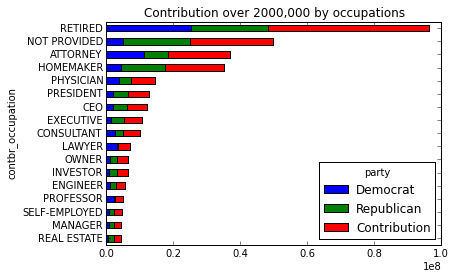

In [451]:
# 累計長條圖
over_2mm['Contribution'] = over_2mm.Democrat + over_2mm.Republican
over_2mm.sort_values(by = 'Contribution').plot.barh(stacked = True)
plt.title('Contribution over 2000,000 by occupations')

In [452]:
def get_top_amounts(group, key, n = 5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    return totals.sort_values(ascending = False)[n:]

In [454]:
# 每位候選人收到的捐款，以行業別區分
grouped = fec_mrbo.groupby('cand_nm')
grouped.apply(get_top_amounts, 'contbr_occupation', n=7)

cand_nm        contbr_occupation                     
Obama, Barack  PROFESSOR                                 2163571.08
               CEO                                       2069784.79
               PRESIDENT                                 1878009.95
               NOT EMPLOYED                              1708108.20
               EXECUTIVE                                 1355161.05
               TEACHER                                   1250969.15
               WRITER                                    1084088.88
               OWNER                                      998867.36
               ENGINEER                                   950425.55
               INVESTOR                                   884133.00
               ARTIST                                     763125.00
               MANAGER                                    762693.22
               SELF-EMPLOYED                              667393.40
               STUDENT                                    6274

In [455]:
# 每位候選人收到的捐款，以企業區分
grouped = fec_mrbo.groupby('cand_nm')
grouped.apply(get_top_amounts, 'contbr_employer', n=7)

cand_nm        contbr_employer                    
Obama, Barack  STUDENT                                318831.45
               VOLUNTEER                              257104.00
               MICROSOFT                              215585.36
               SIDLEY AUSTIN LLP                      168254.00
               REFUSED                                149516.07
               DLA PIPER                              148235.00
               HARVARD UNIVERSITY                     131368.94
               IBM                                    128490.93
               GOOGLE                                 125302.88
               MICROSOFT CORPORATION                  108849.00
               KAISER PERMANENTE                      104949.95
               JONES DAY                              103712.50
               STANFORD UNIVERSITY                    101630.75
               COLUMBIA UNIVERSITY                     96325.12
               UNIVERSITY OF CHICAGO                 

### 對出資額分組

In [459]:
bins = np.array([0, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000])
labels = pd.cut(fec_mrbo.contb_receipt_amt, bins)
labels

411           (10, 100]
412         (100, 1000]
413         (100, 1000]
414           (10, 100]
415           (10, 100]
416           (10, 100]
417         (100, 1000]
418           (10, 100]
419         (100, 1000]
420           (10, 100]
421           (10, 100]
422         (100, 1000]
423         (100, 1000]
424         (100, 1000]
425         (100, 1000]
426         (100, 1000]
427       (1000, 10000]
428         (100, 1000]
429         (100, 1000]
430           (10, 100]
431       (1000, 10000]
432         (100, 1000]
433         (100, 1000]
434         (100, 1000]
435         (100, 1000]
436         (100, 1000]
437           (10, 100]
438         (100, 1000]
439         (100, 1000]
440           (10, 100]
              ...      
701356        (10, 100]
701357          (1, 10]
701358        (10, 100]
701359        (10, 100]
701360        (10, 100]
701361        (10, 100]
701362      (100, 1000]
701363        (10, 100]
701364        (10, 100]
701365        (10, 100]
701366        (1

In [464]:
grouped = fec_mrbo.groupby(['cand_nm', labels])
grouped.size().unstack('cand_nm')

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493,77
"(1, 10]",40070,3681
"(10, 100]",372280,31853
"(100, 1000]",153991,43357
"(1000, 10000]",22284,26186
"(10000, 100000]",2,1
"(100000, 1000000]",3,NaN
"(1000000, 10000000]",4,NaN


In [466]:
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)
bucket_sums

D:\Python\lib\site-packages\pandas\core\index.py:4281: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.sum(name == np.asarray(self.names)) > 1


cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",318.24,77.00
"(1, 10]",337267.62,29819.66
"(10, 100]",20288981.41,1987783.76
"(100, 1000]",54798531.46,22363381.69
"(1000, 10000]",51753705.67,63942145.42
"(10000, 100000]",59100.00,12700.00
"(100000, 1000000]",1490683.08,NaN
"(1000000, 10000000]",7148839.76,NaN


In [471]:
# 捐款 額度 / 總額 比例
normed_sums = bucket_sums.div(bucket_sums.sum(axis = 1), axis = 0)
normed_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,NaN
"(1000000, 10000000]",1.000000,NaN


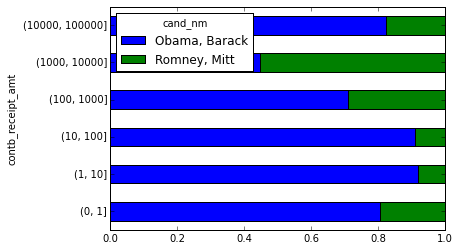

In [479]:
normed_sums[:-2].plot.barh(stacked = True)

### 依據州別統計贊助資料

In [516]:
grouped = fec_mrbo.groupby(['cand_nm', 'contbr_st'])
totals = grouped.contb_receipt_amt.sum()
totals.sort_values().unstack('cand_nm')

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AA,49505.00,135.00
AB,2048.00,NaN
AE,42973.75,5680.00
AK,275353.15,86204.24
AL,537835.48,504882.08
AP,37130.50,1655.00
AR,324802.28,105351.50
AS,2955.00,NaN
AZ,1484241.84,1850484.23


In [510]:
totals[totals > 10000000]

cand_nm        contbr_st
Obama, Barack  CA           23370680.84
               IL           16289009.96
               NY           14421286.14
Romney, Mitt   CA           10908232.46
Name: contb_receipt_amt, dtype: float64

In [521]:
percent = totals.div(totals.sum(), axis = 0)
percent.unstack('cand_nm')

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AA,0.000226,6.172274e-07
AB,0.000009,NaN
AE,0.000196,2.596927e-05
AK,0.001259,3.941305e-04
AL,0.002459,2.308349e-03
AP,0.000170,7.566751e-06
AR,0.001485,4.816728e-04
AS,0.000014,NaN
AZ,0.006786,8.460515e-03
